In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
#from aero.settings import DOCS_PATH

In [2]:
df = pd.read_csv("/scratch/labia/tchoffoc/donnees_mises_en_forme/donnees_obs_predicteurs_temporels_gelee_blanche.csv", delimiter =",")

In [3]:
df.head()

,gelee_blanche_vehicule_presence,H_obs-H_lever_soleil,H_obs-H_coucher_soleil,heure_utc,mois_utc,date
0,0,-8,5,23,11,2017-11-30 23:00:00
1,0,-5,8,0,12,2017-12-01 00:00:00
2,0,-4,9,1,12,2017-12-01 01:00:00
3,0,-3,10,2,12,2017-12-01 02:00:00
4,0,-2,11,3,12,2017-12-01 03:00:00


### Analyse exploratoire sur les données de gelée blanche véhicule

In [4]:
# Compter les occurrences de chaque catégorie
df['gelee_blanche_vehicule_presence'].value_counts()

0    96412
1     4581
Name: gelee_blanche_vehicule_presence, dtype: int64

0    96412
1     4581
Name: gelee_blanche_vehicule_presence, dtype: int64


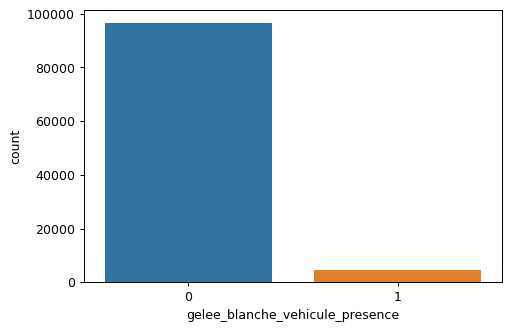

In [10]:
plt.figure(dpi=90)
print(df['gelee_blanche_vehicule_presence'].value_counts())
sns.countplot(x='gelee_blanche_vehicule_presence',data=df)

In [6]:
df.groupby(['mois_utc','gelee_blanche_vehicule_presence']).describe()

H_obs-H_lever_soleil            \
                                                        count      mean   
mois_utc gelee_blanche_vehicule_presence                                  
1        0                                             7610.0  0.329566   
         1                                             1296.0 -3.108025   
2        0                                             7055.0  0.384125   
         1                                             1043.0 -3.450623   
3        0                                             8486.0  0.263139   
         1                                              443.0 -3.293454   
4        0                                             8672.0  1.170549   
         1                                              273.0 -3.468864   
5        0                                             9087.0  1.258611   
         1                                               18.0 -3.222222   
6        0                                             8078.0  1.375464   
7        0                                             8177.0  0.512657   
8        0                                             8171.0  0.685106   
9        0                                             7908.0  0.346990   
         1                                                1.0 -1.000000   
10       0                                             8242.0 -0.180175   
         1                                               46.0 -2.804348   
11       0                                             7509.0 -0.239313   
         1                                              450.0 -3.131111   
12       0                                             7417.0  0.372657   
         1                                             1011.0 -2.721068   

                                                                               \
                                               std   min  25%  50%  75%   max   
mois_utc gelee_blanche_vehicule_presence                                        
1        0                                6.896275 -12.0 -5.0  1.0  6.0  12.0   
         1                                5.556788 -12.0 -8.0 -3.0  0.0  12.0   
2        0                                6.803252 -12.0 -5.0  1.0  6.0  11.0   
         1                                4.077018 -12.0 -6.0 -3.0 -1.0  11.0   
3        0                                6.442671 -11.0 -6.0  0.0  6.0  11.0   
         1                                2.490639 -11.0 -5.0 -3.0 -1.0   2.0   
4        0                                6.364117 -10.0 -5.0  1.0  7.0  12.0   
         1                                2.045427 -10.0 -5.0 -3.0 -2.0   0.0   
5        0                                6.121093  -9.0 -4.0  1.0  7.0  12.0   
         1                                1.114374  -5.0 -4.0 -3.0 -2.0  -2.0   
6        0                                5.944777  -8.0 -4.0  0.5  6.0  12.0   
7        0                                5.852443  -9.0 -5.0  0.0  6.0  12.0   
8        0                                6.108573 -10.0 -5.0  0.0  6.0  12.0   
9        0                                6.513655 -11.0 -5.0  0.0  6.0  12.0   
         1                                     NaN  -1.0 -1.0 -1.0 -1.0  -1.0   
10       0                                6.774359 -12.0 -6.0  0.0  6.0  11.0   
         1                                2.587316  -9.0 -4.0 -2.0 -1.0   1.0   
11       0                                7.112826 -13.0 -7.0  0.0  6.0  11.0   
         1                                4.264439 -13.0 -5.0 -2.0  0.0  11.0   
12       0                                7.228173 -13.0 -5.0  1.0  6.0  12.0   
         1                                5.924888 -13.0 -8.0 -2.0  0.0  12.0   

                                         H_obs-H_coucher_soleil             \
                                                          count       mean   
mois_utc gelee_blanche_vehicule_presence                                     
1        0                                               7610

## Occurences de gelée blanche véhicule par mois 

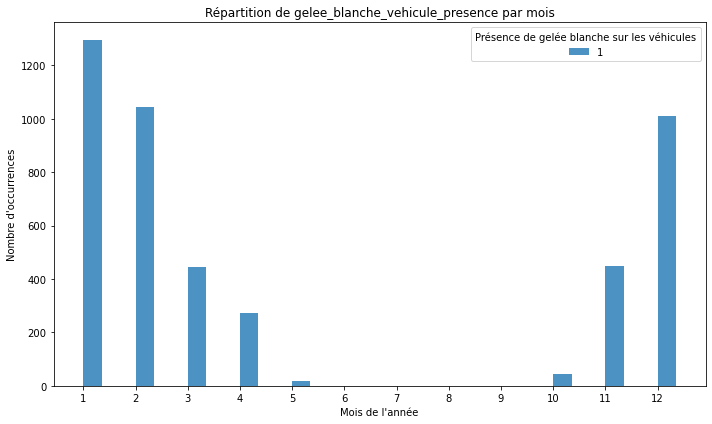

In [7]:
# Grouper les données par mois et calculer les occurrences de chaque catégorie
df_grouped = df.groupby(['mois_utc', 'gelee_blanche_vehicule_presence']).size().unstack()

# Créer un tableau de mois
months = np.arange(1, 13)

# Générer le graphique en barres groupées
plt.figure(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8

# plt.bar(months - bar_width/2, df_grouped[0], bar_width, alpha=opacity, label='0')
plt.bar(months + bar_width/2, df_grouped[1], bar_width, alpha=opacity, label='1')

plt.xlabel('Mois de l\'année')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition de gelee_blanche_vehicule_presence par mois')
plt.xticks(months)
plt.legend(title='Présence de gelée blanche sur les véhicules')
plt.tight_layout()
plt.show()

## Occurences de gelée blanche véhicule par heure 

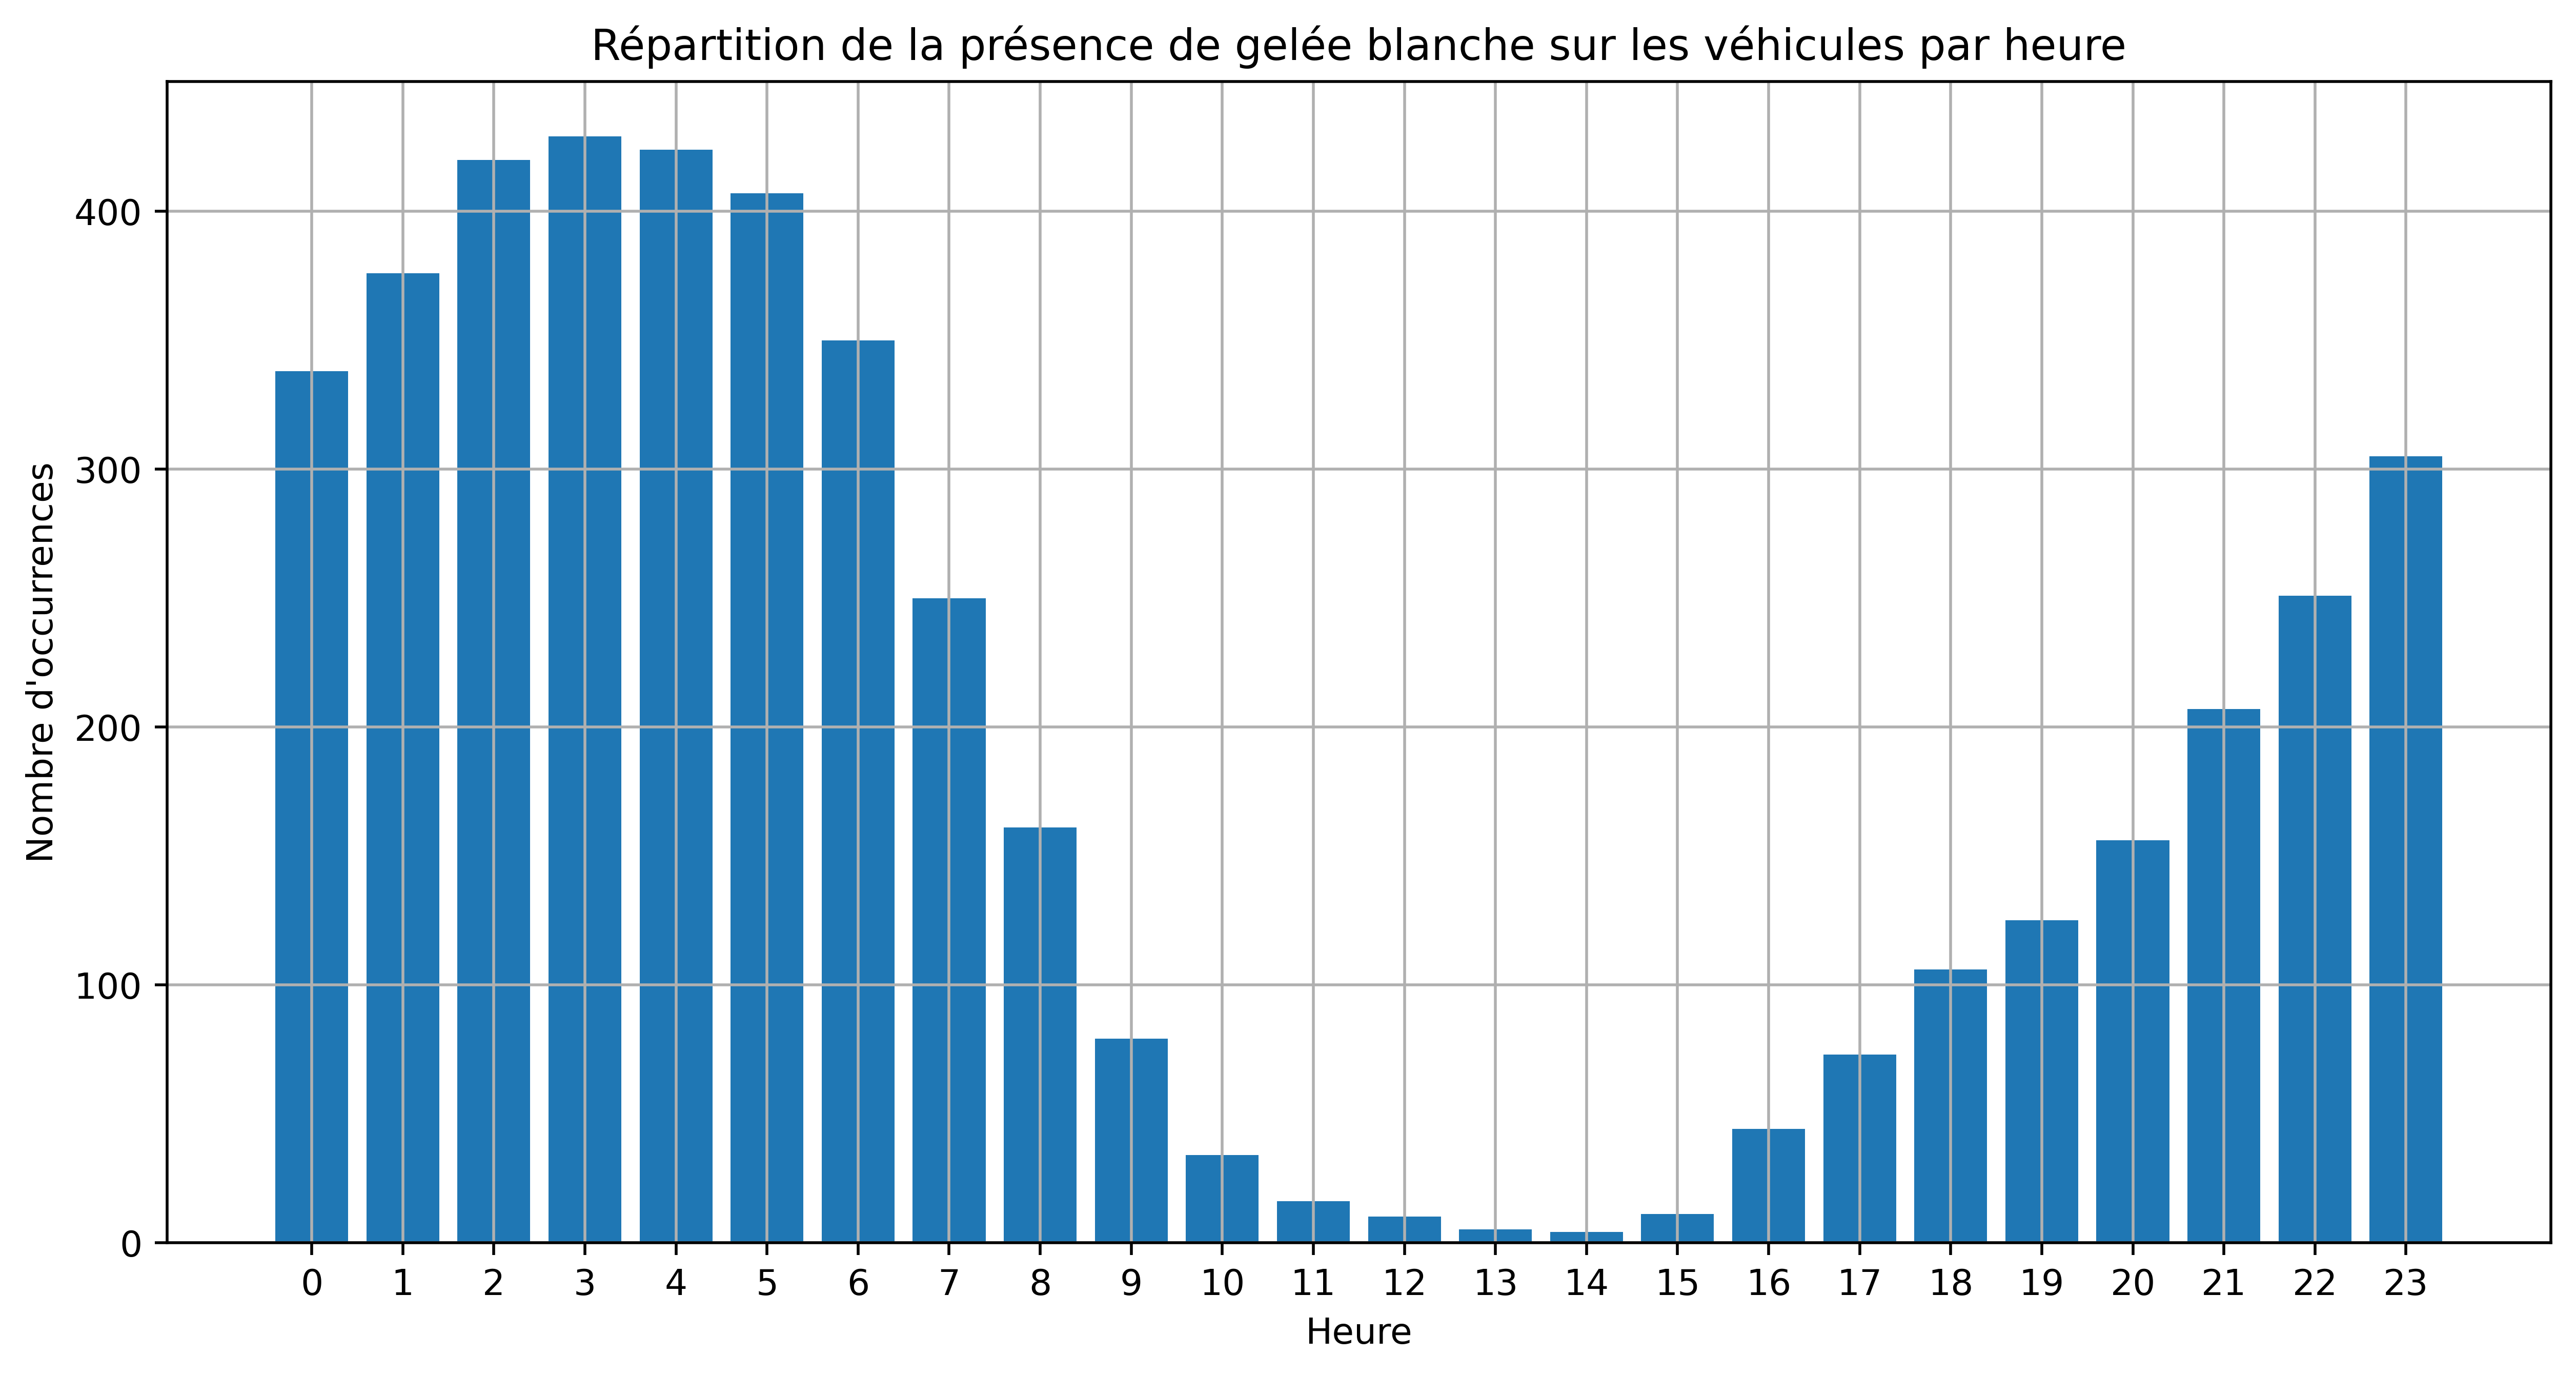

In [8]:
# Filtrer les données où la présence de gelée blanche sur les véhicules est observée
presence_gelee = df[df['gelee_blanche_vehicule_presence'] == 1]

# Compter le nombre d'occurrences pour chaque heure
occurrences_par_heure = presence_gelee['heure_utc'].value_counts().sort_index()

# Créer le graphique en barres
plt.figure(figsize=(12, 6),dpi = 500)
plt.bar(occurrences_par_heure.index, occurrences_par_heure.values)

plt.xlabel('Heure')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition de la présence de gelée blanche sur les véhicules par heure')
plt.xticks(range(24))
plt.grid(True)

plt.show()


### Graphiques d'occurence de gelée en fonction de H_obs-H_lever et H_obs-H_coucher 

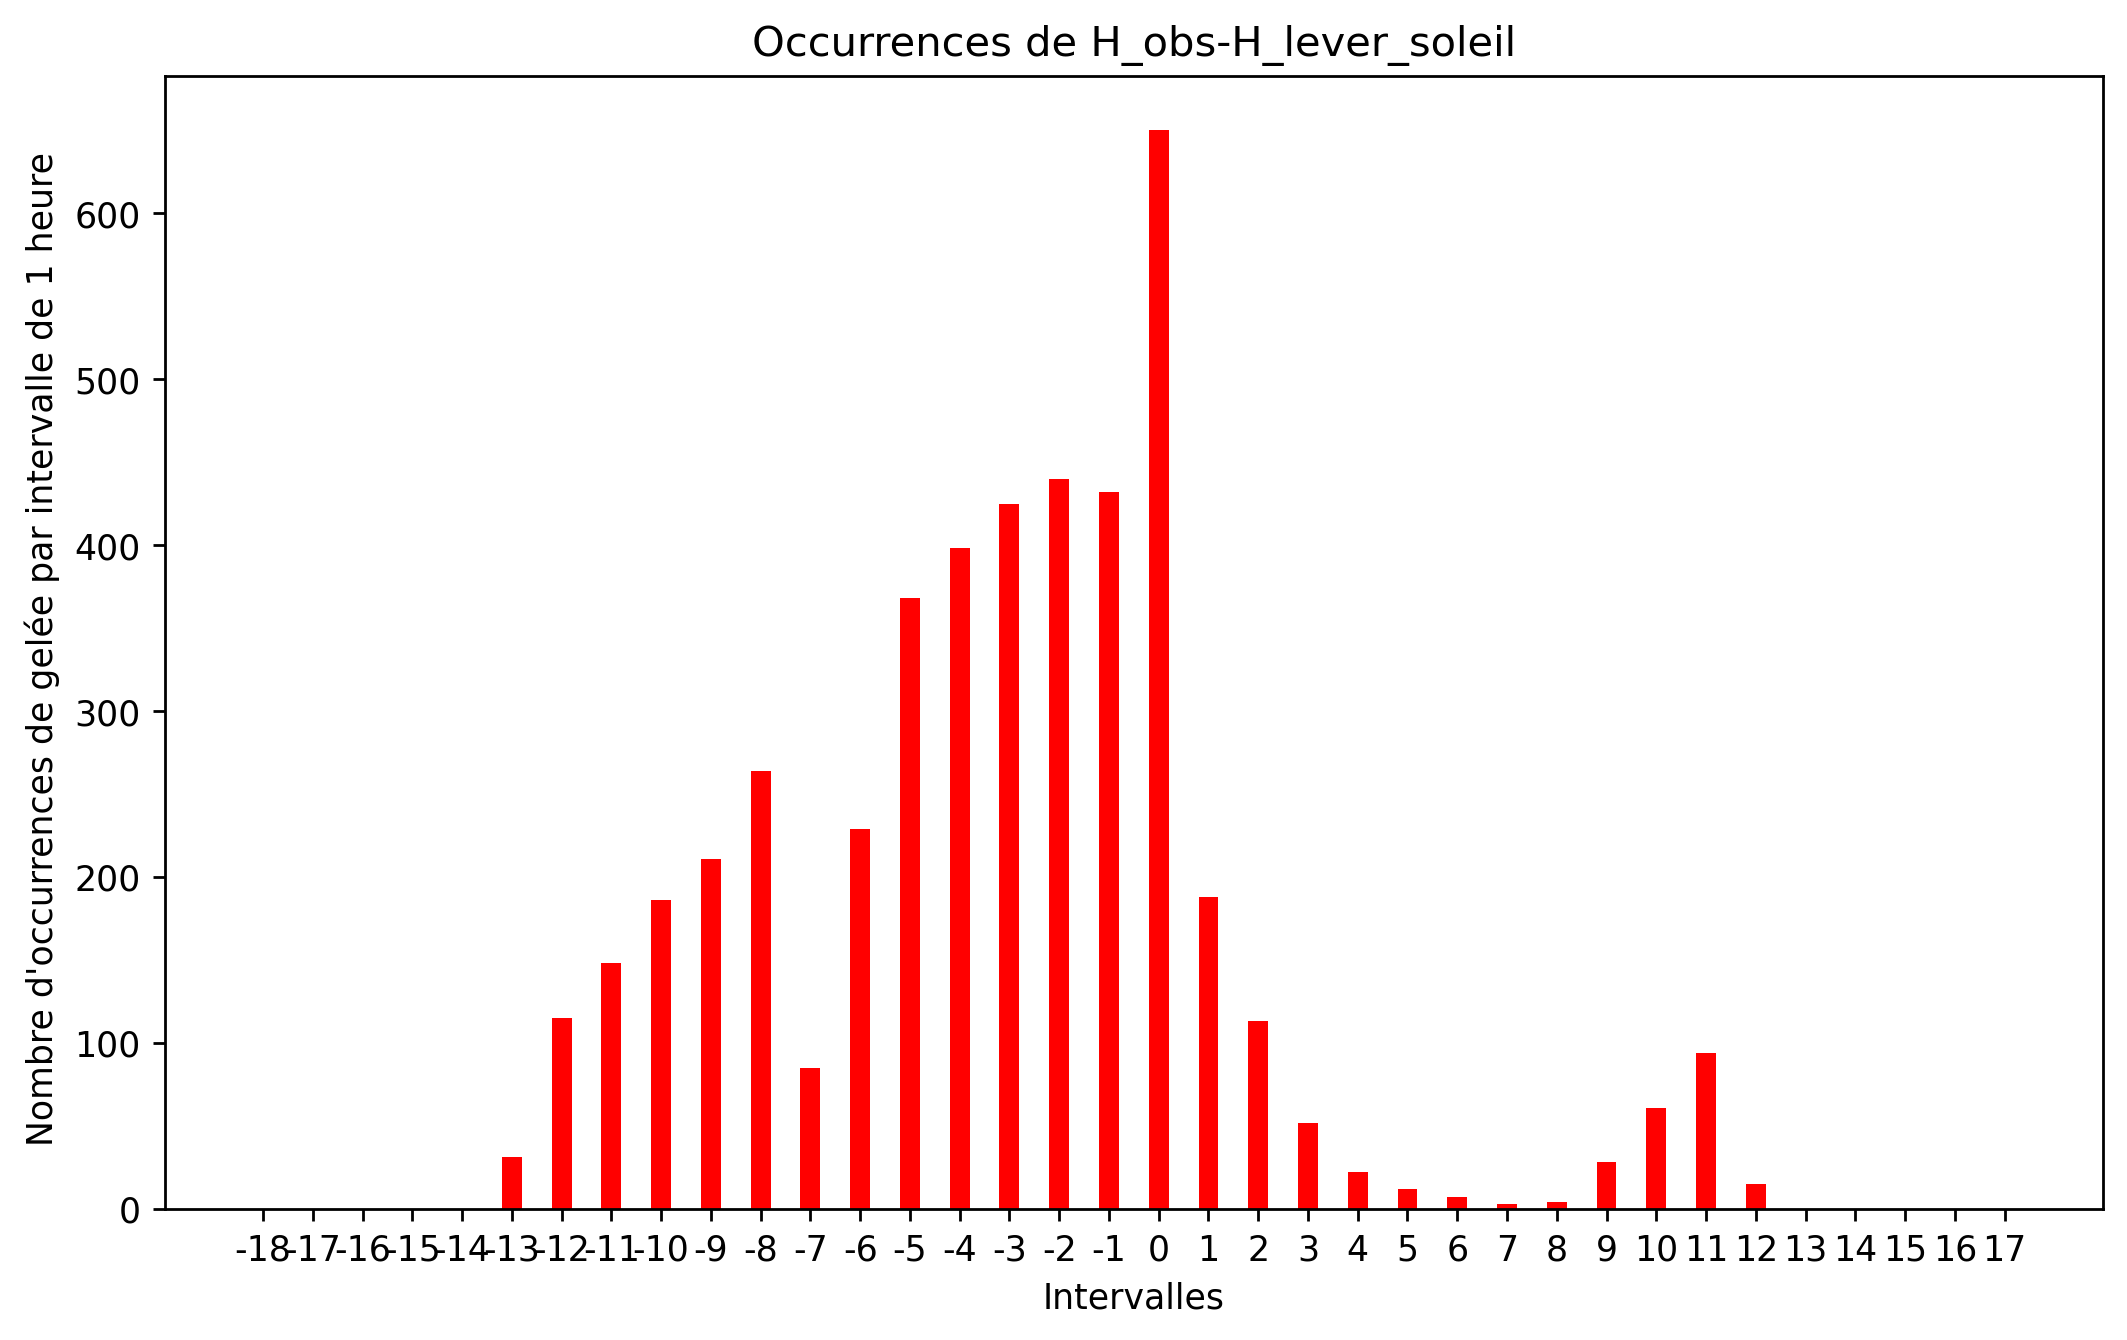

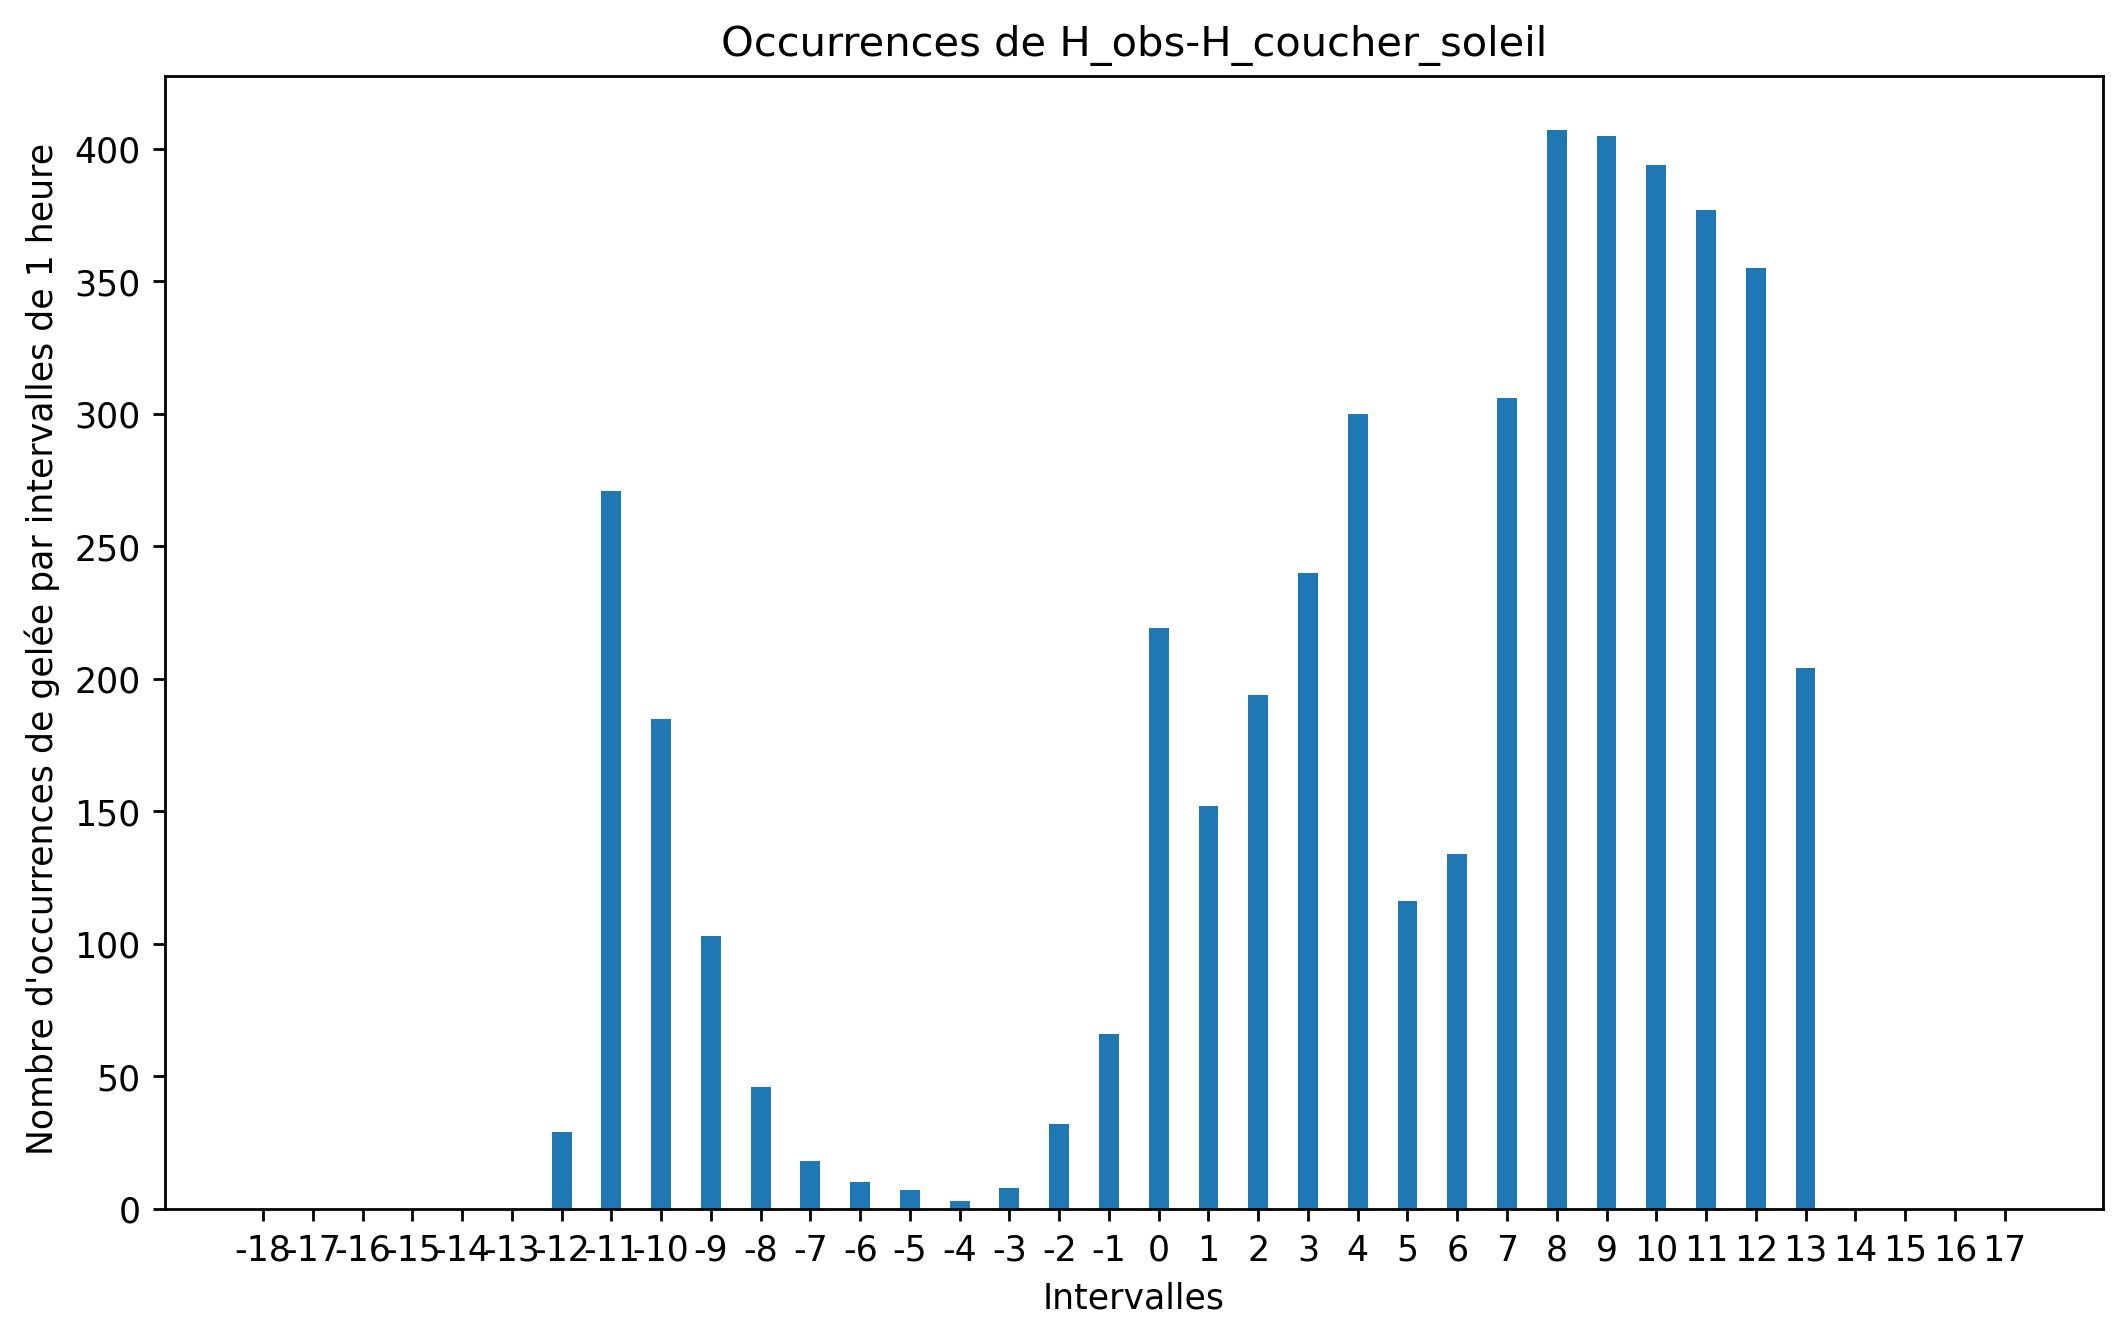

In [9]:
# Définir les bornes des intervalles
interval_min = -18
interval_max = 18
interval_step = 1

a  = df[df["gelee_blanche_vehicule_presence"]==1]["H_obs-H_lever_soleil"]
b = df[df["gelee_blanche_vehicule_presence"]==1]["H_obs-H_coucher_soleil"]

# Générer les intervalles
intervals = range(interval_min, interval_max, interval_step)

# Compter le nombre d'occurrences dans chaque intervalle
counts_coucher = []
counts_lever = []

for interval in intervals:
    count_lever = ((a >= interval) & (a < interval + interval_step)).sum()
    count_coucher = ((b >= interval) & (b < interval + interval_step)).sum()
    counts_lever.append(count_lever)
    counts_coucher.append(count_coucher)

    
# Tracer le graphique pour H_obs-H_lever_soleil
plt.figure(figsize=(10, 6), dpi= 250 ) 
plt.bar(np.arange(len(intervals)), counts_lever, width=0.4, align='center', color='red')
plt.xlabel('Intervalles')
plt.ylabel('Nombre d\'occurrences de gelée par intervalle de 1 heure ')
plt.title('Occurrences de H_obs-H_lever_soleil')
plt.xticks(np.arange(len(intervals)), intervals)
plt.show()



# Tracer le graphique pour H_obs-H_coucher_soleil
plt.figure(figsize=(10, 6), dpi = 250)
plt.bar(np.arange(len(intervals)), counts_coucher, width=0.4, align='center')
plt.xlabel('Intervalles')
plt.ylabel('Nombre d\'occurrences de gelée par intervalles de 1 heure ')
plt.title('Occurrences de H_obs-H_coucher_soleil')
plt.xticks(np.arange(len(intervals)), intervals)
plt.show()
